In [367]:
import os
import calendar
from pathlib import Path # to interact with file system.
import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing
from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression # for linear regression model.
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import roc_auc_score, log_loss
import math
import networkx as nx
import statsmodels.formula.api as sm
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns # Making statistical graphs on top of what matplot can do 
from sklearn import preprocessing
import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import gainsChart, liftChart
import matplotlib.pylab as plt
%matplotlib inline 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [368]:
df = pd.read_csv('Songs_data.csv')
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#     0.346    -1.828  Major   
1       137373   0.737             0.000  F#     0.151    -5.559  Minor   
2       170267   0.131             0.000   C     0.103   -13.879  Minor   
3       152427   0.326             0.000  C#     0.099   -12.178  Major   
4        82625   0.225             0.123   F     0.202   -21.150  Major   

   speechiness    tempo time_signature  valence  
0        0.052  166.969            4/4    0.814  
1        0.087  174.003            4/4    0.816  
2        0.036   99.488            5/4    0.368  
3        0.040  171.758            4/4    0.227  
4        0.046  140.576            4/4    0.390

In [369]:
df.shape

(20000, 18)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             20000 non-null  object 
 1   artist_name       20000 non-null  object 
 2   track_name        20000 non-null  object 
 3   track_id          20000 non-null  object 
 4   popularity        20000 non-null  int64  
 5   acousticness      20000 non-null  float64
 6   danceability      20000 non-null  float64
 7   duration_ms       20000 non-null  int64  
 8   energy            20000 non-null  float64
 9   instrumentalness  20000 non-null  float64
 10  key               20000 non-null  object 
 11  liveness          20000 non-null  float64
 12  loudness          20000 non-null  float64
 13  mode              20000 non-null  object 
 14  speechiness       20000 non-null  float64
 15  tempo             20000 non-null  float64
 16  time_signature    20000 non-null  object

In [371]:
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [372]:
df.describe()

popularity  acousticness  danceability  duration_ms     energy  \
count   20000.000     2.000e+04     20000.000    2.000e+04  20000.000   
mean       50.312     2.013e-01         0.581    2.276e+05      0.677   
std        13.470     2.520e-01         0.143    7.731e+04      0.202   
min         0.000     1.390e-06         0.062    1.880e+04      0.002   
25%        43.000     1.160e-02         0.489    1.935e+05      0.536   
50%        51.000     8.250e-02         0.586    2.189e+05      0.703   
75%        58.000     3.110e-01         0.683    2.503e+05      0.842   
max       100.000     9.960e-01         0.973    3.631e+06      0.999   

       instrumentalness   liveness   loudness  speechiness      tempo  \
count         2.000e+04  20000.000  20000.000    20000.000  20000.000   
mean          3.879e-02      0.193     -6.752        0.080    121.647   
std           1.445e-01      0.154      3.032        0.088     29.005   
min           0.000e+00      0.015    -30.016        0.022     32.244   
25%           0.000e+00      0.097     -8.122        0.034     98.672   
50%           5.770e-06      0.130     -6.089        0.047    120.019   
75%           8.263e-04      0.247     -4.666        0.084    140.058   
max           9.840e-01      0.996      1.342        0.961    216.029   

         valence  
count  20000.000  
mean       0.491  
std        0.226  
min        0.000  
25%        0.318  
50%        0.481  
75%        0.662  
max        0.986

In [373]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [374]:
numerical_columns = ['popularity','acousticness','danceability','duration_ms','energy',
                    'instrumentalness','liveness','loudness','speechiness','tempo','valence']

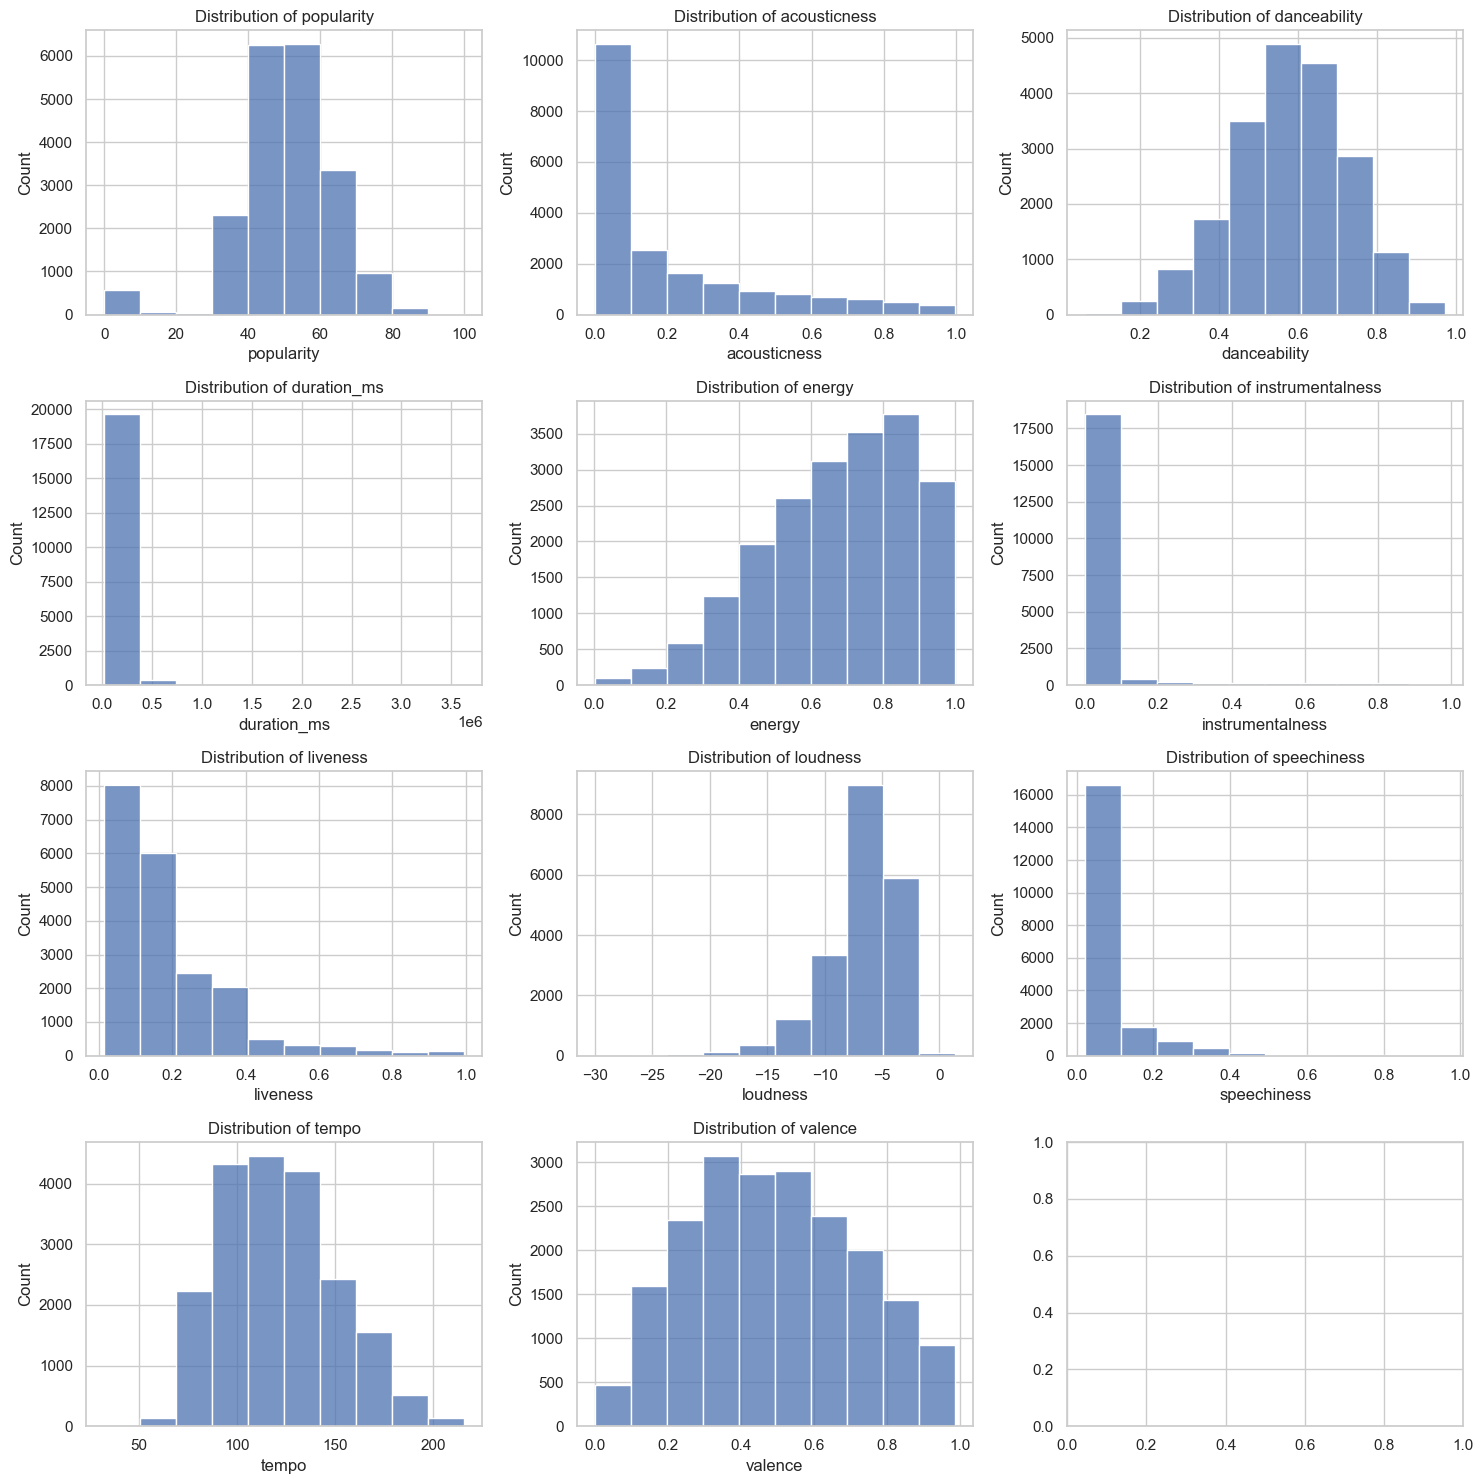

In [375]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
for i, column in enumerate(numerical_columns):
    ax = axs[i//3, i%3]
    sns.histplot(data=df, x=column, bins=10, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title('Distribution of {}'.format(column))
plt.tight_layout()
plt.show()

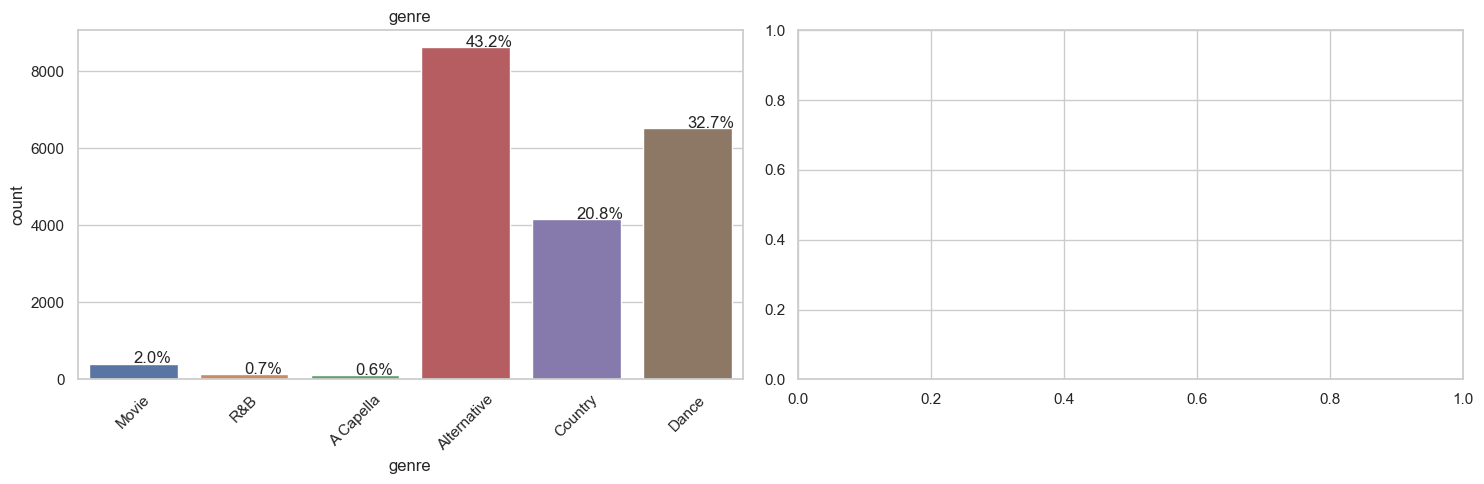

In [376]:
cat_cols = ['genre']
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))
for i, col in enumerate(cat_cols):
    ax = axs[i]
    sns.set(style="whitegrid")
    c = sns.countplot(data=df, x=col, ax=ax)
    for p in c.patches:
        c.annotate('{:.1f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.4, p.get_height()+5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [377]:
correlation_matrix = df.corr()
correlation_matrix

popularity  acousticness  danceability  duration_ms  energy  \
popularity             1.000        -0.256         0.180       -0.026   0.179   
acousticness          -0.256         1.000        -0.005       -0.023  -0.675   
danceability           0.180        -0.005         1.000       -0.116  -0.086   
duration_ms           -0.026        -0.023        -0.116        1.000  -0.015   
energy                 0.179        -0.675        -0.086       -0.015   1.000   
instrumentalness      -0.032         0.005        -0.081        0.088  -0.004   
liveness              -0.051        -0.055        -0.084        0.030   0.150   
loudness               0.271        -0.557        -0.009       -0.056   0.752   
speechiness            0.013         0.021         0.105        0.043   0.039   
tempo                 -0.008        -0.131        -0.215       -0.007   0.181   
valence                0.023        -0.120         0.407       -0.141   0.267   

                  instrumentalness  liveness  loudness  speechiness  tempo  \
popularity                  -0.032    -0.051     0.271        0.013 -0.008   
acousticness                 0.005    -0.055    -0.557        0.021 -0.131   
danceability                -0.081    -0.084    -0.009        0.105 -0.215   
duration_ms                  0.088     0.030    -0.056        0.043 -0.007   
energy                      -0.004     0.150     0.752        0.039  0.181   
instrumentalness             1.000     0.011    -0.126       -0.061 -0.009   
liveness                     0.011     1.000     0.064        0.102  0.016   
loudness                    -0.126     0.064     1.000       -0.030  0.125   
speechiness                 -0.061     0.102    -0.030        1.000  0.022   
tempo                       -0.009     0.016     0.125        0.022  1.000   
valence                     -0.061     0.031     0.125        0.053  0.029   

                  valence  
popularity          0.023  
acousticness       -0.120  
danceability        0.407  
duration_ms        -0.141  
energy              0.267  
instrumentalness   -0.061  
liveness            0.031  
loudness            0.125  
speechiness         0.053  
tempo               0.029  
valence             1.000

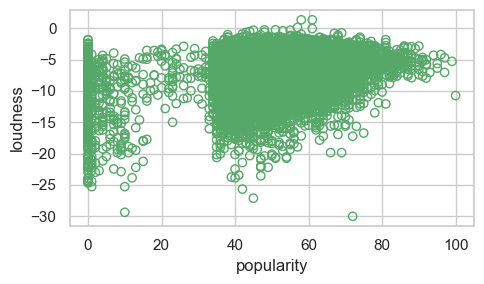

In [378]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)
ax.scatter(df.popularity, df.loudness, color='C2', facecolor='none')
plt.xlabel('popularity')
plt.ylabel('loudness')
plt.tight_layout()
plt.show()

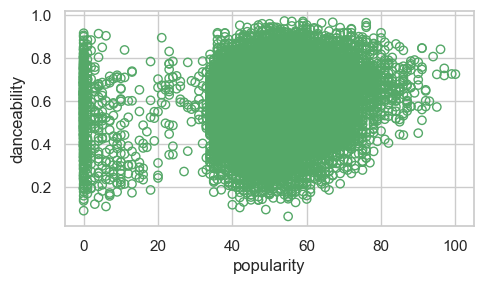

In [379]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)
ax.scatter(df.popularity, df.danceability, color='C2', facecolor='none')
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.tight_layout()
plt.show()

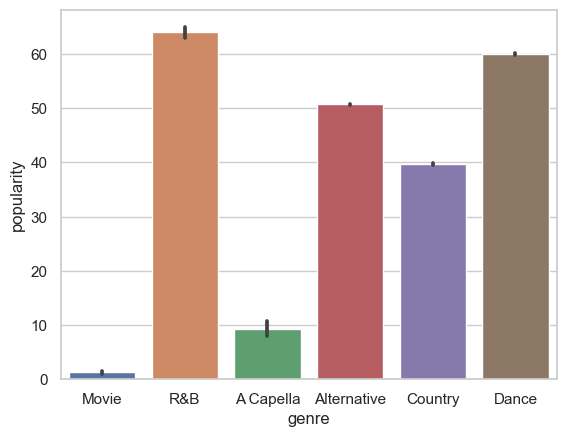

In [380]:
sns.barplot(x='genre', y='popularity', data=df)
plt.show()

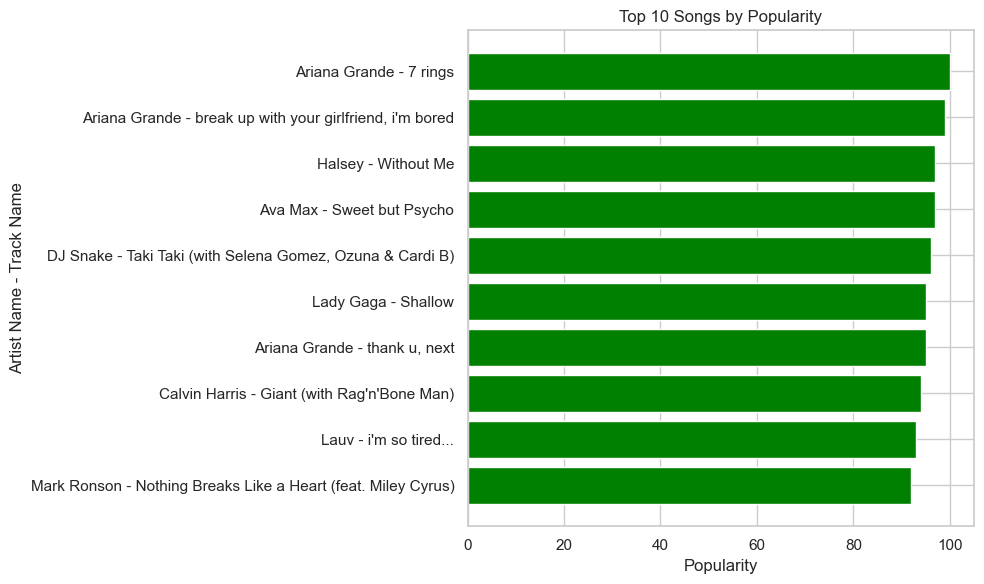

In [381]:
import matplotlib.pyplot as plt
top_songs = df.sort_values(by='popularity', ascending=False).head(10)
bar_color = 'salmon'
plt.figure(figsize=(10, 6))
plt.barh(top_songs['artist_name'] + ' - ' + top_songs['track_name'], top_songs['popularity'], color='green')
plt.xlabel('Popularity')
plt.ylabel('Artist Name - Track Name')
plt.title('Top 10 Songs by Popularity')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

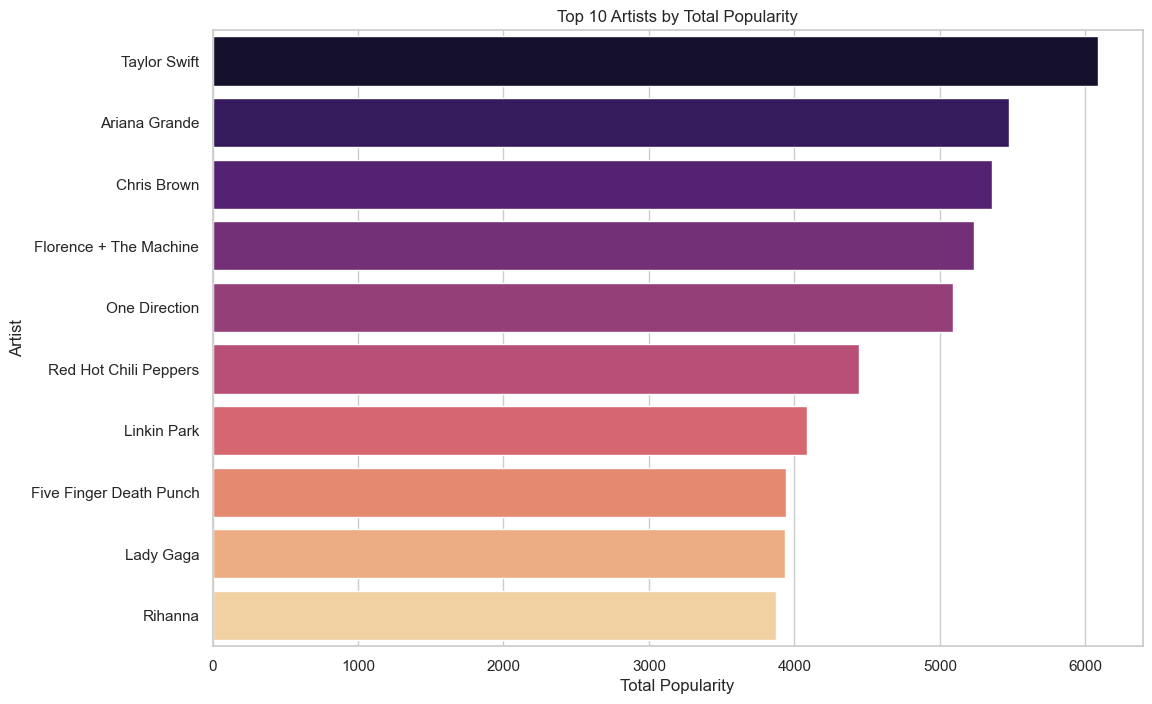

In [382]:
# Group by artist and sum the popularity
artist_data = df.groupby('artist_name')['popularity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=artist_data.values, y=artist_data.index, palette='magma')
plt.xlabel('Total Popularity')
plt.ylabel('Artist')
plt.title('Top 10 Artists by Total Popularity')
plt.show()

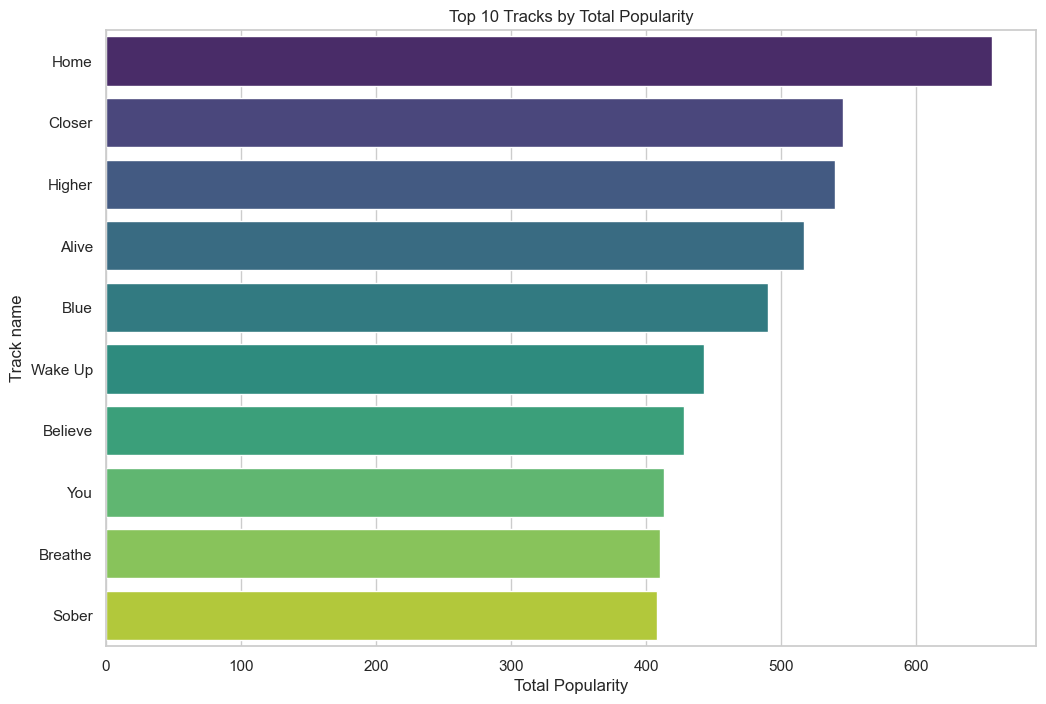

In [383]:
track_data = df.groupby('track_name')['popularity'].sum().sort_values(ascending=False).head(10)
# Plot a bar chart of track data
plt.figure(figsize=(12, 8))
sns.barplot(x=track_data.values, y=track_data.index, palette='viridis')
plt.xlabel('Total Popularity')
plt.ylabel('Track name')
plt.title('Top 10 Tracks by Total Popularity')
plt.show()

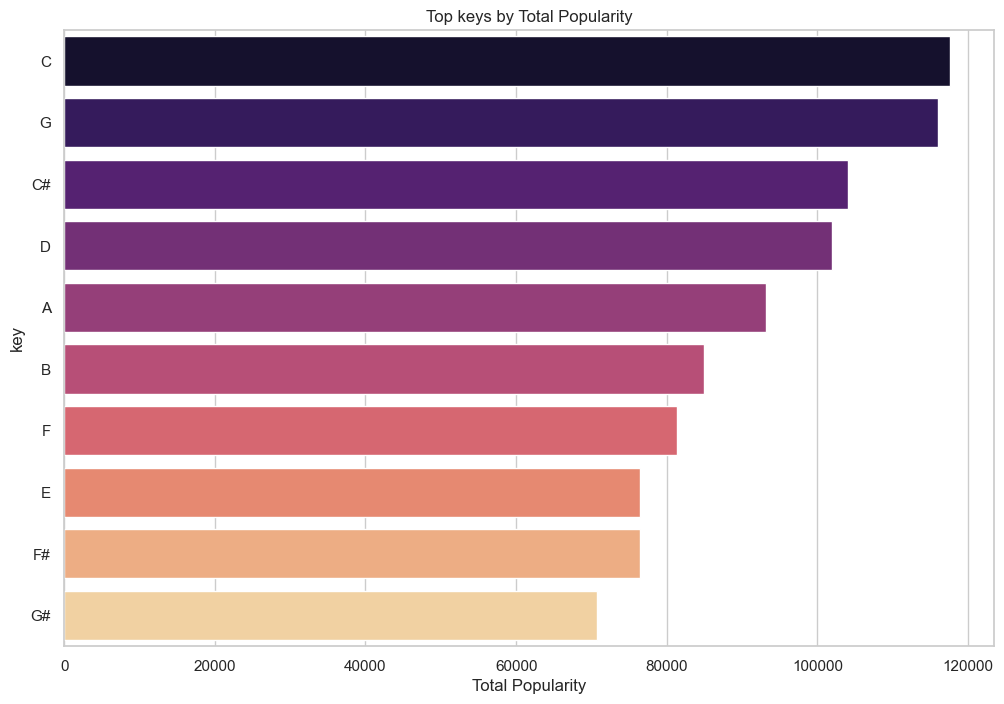

In [384]:
key_data = df.groupby('key')['popularity'].sum().sort_values(ascending=False).head(10)
# Plot a bar chart of key data
plt.figure(figsize=(12, 8))
sns.barplot(x=key_data.values, y=key_data.index, palette='magma')
plt.xlabel('Total Popularity')
plt.ylabel('key')
plt.title('Top keys by Total Popularity')
plt.show()

C:\Users\janar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='popularity'>

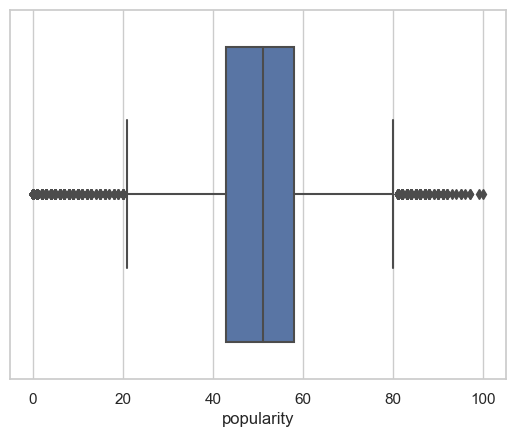

In [385]:
sns.boxplot(df['popularity'])

In [386]:
df['track_name'].duplicated().sum() 

2539

In [387]:
df.loc[df['track_name'].duplicated()]

genre                           artist_name  \
948        Country                          Alan Jackson   
1012       Country                    Tech N9ne Collabos   
1068       Country                         Brooks & Dunn   
1152   Alternative                             Radiohead   
1175   Alternative                               Skillet   
1211   Alternative                             Mac Ayres   
1279   Alternative                             Shinedown   
1348   Alternative                              Doja Cat   
1379   Alternative                           Frank Ocean   
1385   Alternative                           Frank Ocean   
1452   Alternative                           Frank Ocean   
1554   Alternative                            Steve Lacy   
1596   Alternative                            Nickelback   
1634   Alternative                              tobi lou   
1651   Alternative                              GoldLink   
1660   Alternative                                 Dijon   
1698   Alternative                             I AM THEY   
1706   Alternative                                  Joji   
1775   Alternative                             Souly Had   
1777   Alternative                          Welshly Arms   
1782   Alternative                              Godsmack   
1786   Alternative                     Avenged Sevenfold   
1805   Alternative                          Foo Fighters   
1838   Alternative                          Tierra Whack   
1842   Alternative                             The Score   
1871   Alternative                                   311   
1902   Alternative                           Arcade Fire   
1905   Alternative                                  Yuna   
1912   Alternative                               Crowder   
2040       Country                          Alan Jackson   
2187       Country                           Joey + Rory   
2225       Country                      Carrie Underwood   
2229       Country                        Nashville Cast   
2265       Country                              The Lacs   
2294       Country                        Jackson Browne   
2317       Country                      Shooter Jennings   
2321       Country                           Johnny Cash   
2357       Country                             Kip Moore   
2373       Country                           Dylan Scott   
2416       Country                            Jelly Roll   
2469       Country                            Luke Bryan   
2500   Alternative                       Big Daddy Weave   
2512   Alternative                          Foo Fighters   
2543   Alternative                         Summer Walker   
2573   Alternative                      Jazmine Sullivan   
2597   Alternative                          Tierra Whack   
2599   Alternative                       Nine Inch Nails   
2611   Alternative                       Escape the Fate   
2634   Alternative                                Saliva   
2636   Alternative                           bLAck pARty   
2639   Alternative                                 6LACK   
2644   Alternative                               Raveena   
2720   Alternative                             DaniLeigh   
2721   Alternative                              Mudvayne   
2726   Alternative                          Grizzly Bear   
2734   Alternative                           Alina Baraz   
2754   Alternative                           Alina Baraz   
2788   Alternative                              Static-X   
2819   Alternative                                 Spoon   
2820   Alternative                        In This Moment   
2832   Alternative                         Trevor Daniel   
2833   Alternative                              Lemaitre   
2834   Alternative                             Orion Sun   
2846   Alternative                                 Spoon   
2893   Alternative                                   UMI   
2913   Alternative                             Sugar 

In [388]:
df.drop_duplicates(subset=['track_name'], keep='first', inplace=True)   #dropping duplicated tracks but keeping the first occurance
df.shape

(17461, 18)

In [389]:
upper_limit = df['popularity'].mean() + 3 * df['popularity'].std()
lower_limit = df['popularity'].mean() - 3 * df['popularity'].std()

In [390]:
df.loc[(df['popularity']>upper_limit), 'popularity']=upper_limit
df.loc[(df['popularity']<lower_limit), 'popularity']=lower_limit

In [391]:
df.drop(columns = ['genre','track_name','artist_name','track_id','time_signature'], axis = 1, inplace =True)

In [392]:
df.head(300)

popularity  acousticness  danceability  duration_ms  energy  \
0         8.472     6.110e-01         0.389        99373   0.910   
1         8.472     2.460e-01         0.590       137373   0.737   
2         8.472     9.520e-01         0.663       170267   0.131   
3         8.472     7.030e-01         0.240       152427   0.326   
4         8.472     9.500e-01         0.331        82625   0.225   
5         8.472     7.490e-01         0.578       160627   0.095   
6         8.472     3.440e-01         0.703       212293   0.270   
7        15.000     9.390e-01         0.416       240067   0.269   
8         8.472     1.040e-03         0.734       226200   0.481   
9        10.000     3.190e-01         0.598       152694   0.705   
10        8.472     9.210e-01         0.191       566960   0.145   
11        8.472     3.830e-02         0.230       121333   0.133   
12        8.472     2.150e-01         0.680       213589   0.600   
13        8.472     9.580e-01         0.758       308627   0.264   
14        8.472     9.700e-01         0.400       159253   0.174   
15        8.472     5.480e-01         0.588      2447870   0.405   
16        8.472     7.000e-01         0.625       523424   0.237   
17        8.472     4.880e-01         0.744       178107   0.953   
18        8.472     3.810e-01         0.451       194360   0.491   
19        8.472     1.610e-01         0.522       207240   0.748   
20        8.472     8.520e-01         0.362       219600   0.436   
21        8.472     5.130e-01         0.855       183467   0.504   
22        8.472     6.890e-01         0.704       161773   0.804   
23        8.472     6.690e-01         0.707        71299   0.696   
24        8.472     7.060e-01         0.526       181441   0.298   
25        8.472     8.820e-01         0.711       299040   0.218   
26        8.472     1.590e-01         0.636       152840   0.594   
27        8.472     8.640e-01         0.594       156973   0.481   
28        8.472     7.160e-01         0.835       142813   0.384   
29        8.472     1.840e-01         0.695       430240   0.500   
30        8.472     3.230e-03         0.711       221320   0.941   
31        8.472     3.050e-01         0.618        49373   0.283   
32        8.472     9.220e-01         0.681       129707   0.440   
33        8.472     9.420e-01         0.883       171027   0.418   
34        8.472     1.230e-01         0.784       235000   0.653   
35        8.472     7.670e-01         0.776       169352   0.468   
36        8.472     1.640e-01         0.848       215333   0.826   
37        8.472     6.190e-01         0.483       218187   0.497   
38        8.472     9.320e-01         0.348       127507   0.200   
39        8.472     5.080e-01         0.567        22413   0.654   
40        8.472     6.490e-01         0.483       189027   0.366   
41        8.472     9.830e-01         0.420       199160   0.064   
42        8.472     9.340e-01         0.336       160053   0.107   
43        8.472     5.760e-01         0.503       121533   0.456   
44        8.472     7.510e-01         0.566       371720   0.512   
45        8.472     6.140e-01         0.434        77067   0.528   
46        8.472     2.870e-02         0.669       181173   0.937   
47        8.472     2.850e-01         0.555       278160   0.773   
48        8.472     6.590e-01         0.804       169853   0.636   
49        8.472     5.810e-01         0.885       212627   0.341   
50        8.472     9.020e-01         0.489       128871   0.260   
51        8.472     3.860e-01         0.430        47172   0.932   
52        8.472     7.120e-01         0.630        56067   0.606   
53        8.472     9.170e-01         0.428       198040   0.317   
54        8.472     9.240e-01         0.683       101653   0.147   
55        8.472     9.670e-01         0.550        28027   0.015   
56        8.472     9.890e-01         0.262       220173   0.151   
57        8.472     7.280e-01         0.538       139840   0.

In [393]:
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
df.dtypes

popularity           float64
acousticness         float64
danceability         float64
duration_ms            int64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
mode                category
speechiness          float64
tempo                float64
valence              float64
dtype: object

In [394]:
df.shape

(17461, 13)

In [395]:
df.isna().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
dtype: int64

In [396]:
dummies = pd.get_dummies(df[['key', 'mode']])
df.drop(columns = ['key', 'mode'], axis =1, inplace = True)
df = pd.concat([df, dummies], axis=1)
df.head()

popularity  acousticness  danceability  duration_ms  energy  \
0       8.472         0.611         0.389        99373   0.910   
1       8.472         0.246         0.590       137373   0.737   
2       8.472         0.952         0.663       170267   0.131   
3       8.472         0.703         0.240       152427   0.326   
4       8.472         0.950         0.331        82625   0.225   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  key_A  \
0             0.000     0.346    -1.828        0.052  166.969    0.814      0   
1             0.000     0.151    -5.559        0.087  174.003    0.816      0   
2             0.000     0.103   -13.879        0.036   99.488    0.368      0   
3             0.000     0.099   -12.178        0.040  171.758    0.227      0   
4             0.123     0.202   -21.150        0.046  140.576    0.390      0   

   key_A#  key_B  key_C  key_C#  key_D  key_D#  key_E  key_F  key_F#  key_G  \
0       0      0      0       1      0       0      0      0       0      0   
1       0      0      0       0      0       0      0      0       1      0   
2       0      0      1       0      0       0      0      0       0      0   
3       0      0      0       1      0       0      0      0       0      0   
4       0      0      0       0      0       0      0      1       0      0   

   key_G#  mode_Major  mode_Minor  
0       0           1           0  
1       0           0           1  
2       0           0           1  
3       0           1           0  
4       0           1           0

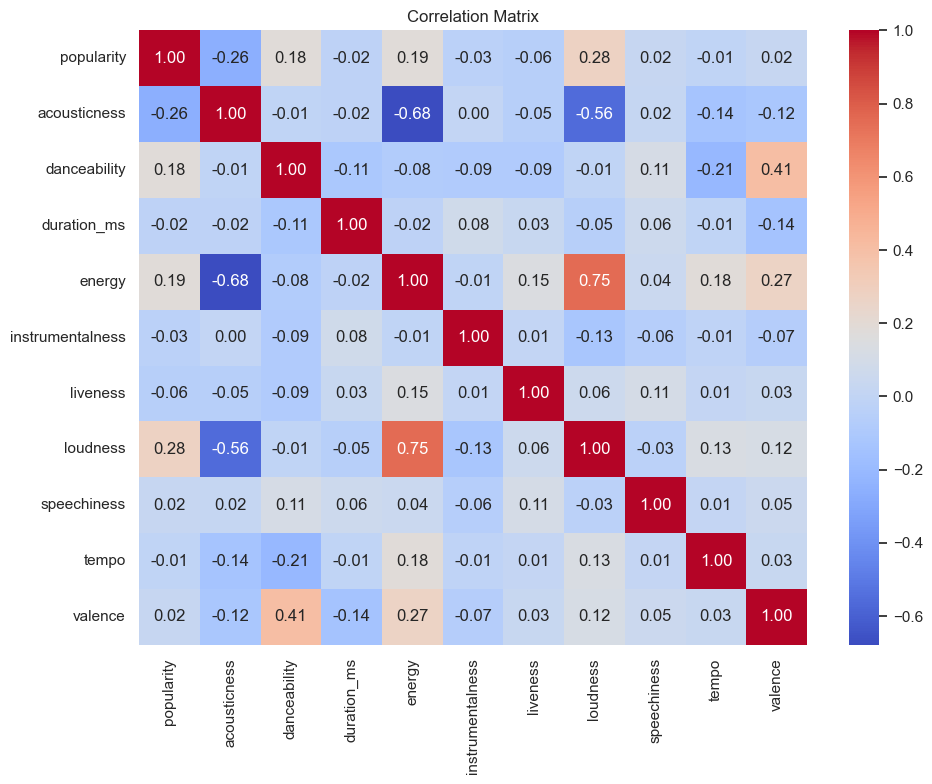

In [397]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [398]:
categorical_columns=['key_A','key_A#','key_B','key_C','key_C#','key_D','key_D#','key_E',
                     'key_F','key_F#','key_G','key_G#','mode_Major','mode_Minor']

In [399]:
normalized_df = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()   #normalizing the numeric variables 
normalized_df = pd.concat([normalized_df, df[categorical_columns]], axis=1)

In [400]:
normalized_df.head()

popularity  acousticness  danceability  duration_ms  energy  \
0      -3.197         1.591        -1.327       -1.595   1.146   
1      -3.197         0.162         0.071       -1.121   0.299   
2      -3.197         2.926         0.578       -0.711  -2.668   
3      -3.197         1.951        -2.362       -0.933  -1.713   
4      -3.197         2.918        -1.730       -1.804  -2.208   

   instrumentalness  liveness  loudness  speechiness  tempo  valence  key_A  \
0            -0.263     0.979     1.610       -0.322  1.554    1.416      0   
1            -0.263    -0.272     0.404        0.061  1.796    1.425      0   
2            -0.263    -0.580    -2.287       -0.504 -0.765   -0.552      0   
3            -0.263    -0.609    -1.737       -0.467  1.719   -1.175      0   
4             0.600     0.055    -4.639       -0.399  0.647   -0.455      0   

   key_A#  key_B  key_C  key_C#  key_D  key_D#  key_E  key_F  key_F#  key_G  \
0       0      0      0       1      0       0      0      0       0      0   
1       0      0      0       0      0       0      0      0       1      0   
2       0      0      1       0      0       0      0      0       0      0   
3       0      0      0       1      0       0      0      0       0      0   
4       0      0      0       0      0       0      0      1       0      0   

   key_G#  mode_Major  mode_Minor  
0       0           1           0  
1       0           0           1  
2       0           0           1  
3       0           1           0  
4       0           1           0

In [401]:
normalized_df.isnull().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
key_A               0
key_A#              0
key_B               0
key_C               0
key_C#              0
key_D               0
key_D#              0
key_E               0
key_F               0
key_F#              0
key_G               0
key_G#              0
mode_Major          0
mode_Minor          0
dtype: int64

In [402]:
normalized_df.dropna(inplace=True)  # Drops rows with any NaN/null value in any column

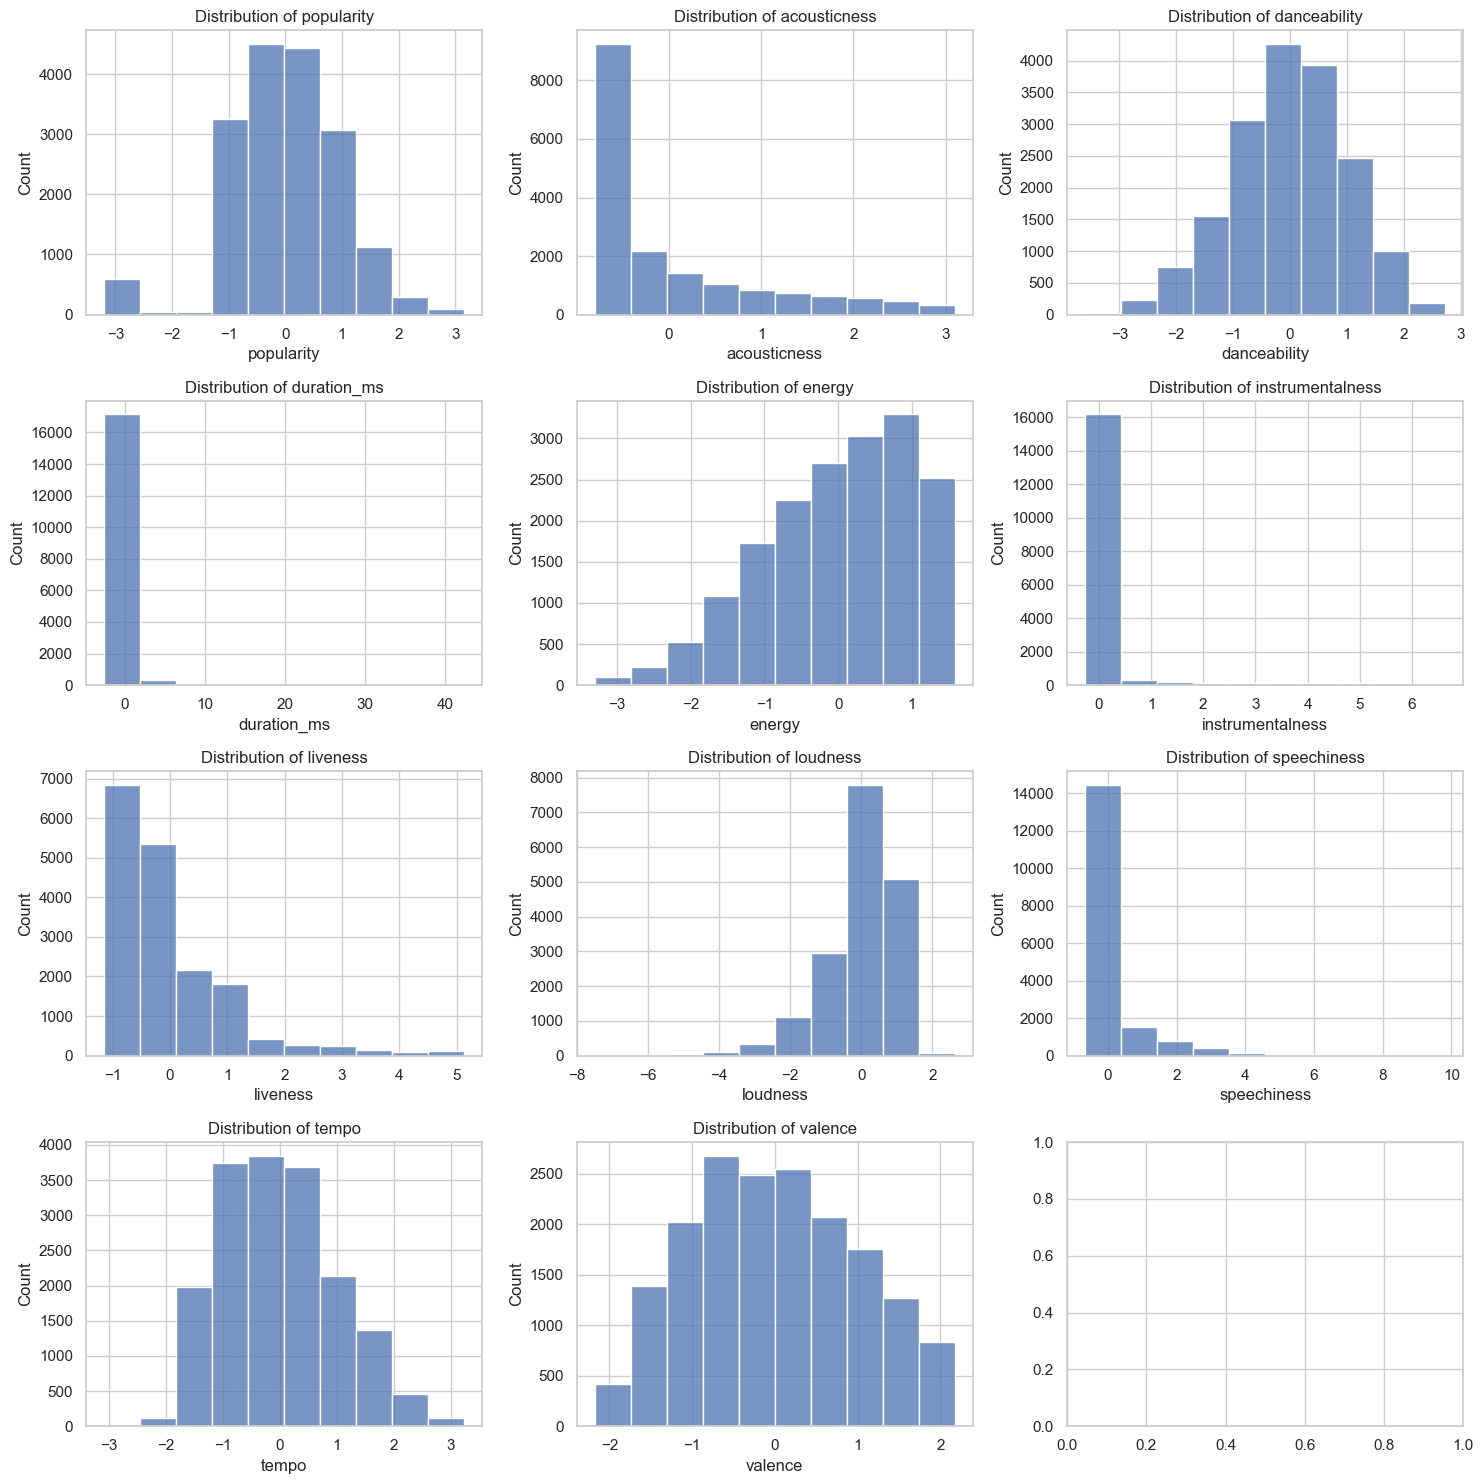

In [403]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
for i, col in enumerate(numerical_columns):
    ax = axs[i//3, i%3]
    sns.histplot(data=normalized_df, x=col, bins=10, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title('Distribution of {}'.format(col))
plt.tight_layout()
plt.show()

In [404]:
X = pd.get_dummies(normalized_df.drop(columns=['popularity']), drop_first=False)  #defining the predictors
y = normalized_df['popularity'] 

In [405]:
df.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
key_A                 uint8
key_A#                uint8
key_B                 uint8
key_C                 uint8
key_C#                uint8
key_D                 uint8
key_D#                uint8
key_E                 uint8
key_F                 uint8
key_F#                uint8
key_G                 uint8
key_G#                uint8
mode_Major            uint8
mode_Minor            uint8
dtype: object

In [406]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
# Split the train set into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.4, random_state=20)
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_valid.shape, y_valid.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (7333, 24) (7333,)
Validation set: (4889, 24) (4889,)
Test set: (5239, 24) (5239,)


In [407]:
X.head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
0         1.591        -1.327       -1.595   1.146            -0.263   
1         0.162         0.071       -1.121   0.299            -0.263   
2         2.926         0.578       -0.711  -2.668            -0.263   
3         1.951        -2.362       -0.933  -1.713            -0.263   
4         2.918        -1.730       -1.804  -2.208             0.600   

   liveness  loudness  speechiness  tempo  valence  key_A  key_A#  key_B  \
0     0.979     1.610       -0.322  1.554    1.416      0       0      0   
1    -0.272     0.404        0.061  1.796    1.425      0       0      0   
2    -0.580    -2.287       -0.504 -0.765   -0.552      0       0      0   
3    -0.609    -1.737       -0.467  1.719   -1.175      0       0      0   
4     0.055    -4.639       -0.399  0.647   -0.455      0       0      0   

   key_C  key_C#  key_D  key_D#  key_E  key_F  key_F#  key_G  key_G#  \
0      0       1      0       0      0      0       0      0       0   
1      0       0      0       0      0      0       1      0       0   
2      1       0      0       0      0      0       0      0       0   
3      0       1      0       0      0      0       0      0       0   
4      0       0      0       0      0      1       0      0       0   

   mode_Major  mode_Minor  
0           1           0  
1           0           1  
2           0           1  
3           1           0  
4           1           0

In [408]:
y.head()

0   -3.197
1   -3.197
2   -3.197
3   -3.197
4   -3.197
Name: popularity, dtype: float64

In [409]:
y.isnull().sum()

0

In [410]:
# Fit the model on the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Predict on the validation data and calculate the R^2 score
y_pred = lr_model.predict(X_valid)
r2 = lr_model.score(X_valid, y_valid)
mse = mean_squared_error(y_valid, y_pred)
# calculate R-squared
r2 = r2_score(y_valid, y_pred)
# calculate number of predictors
p = X_train.shape[1]
# calculate adjusted R-squared
n = X_valid.shape[0]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Mean Squared Error:", mse)
print("LR RMSE: {:.2f}".format(np.sqrt(mse)))
print("R^2 Score:", r2_score)
print("Adjusted R-squared:", adj_r2)

Mean Squared Error: 0.8525726520567771
LR RMSE: 0.92
R^2 Score: <function r2_score at 0x0000012F1BCEBAF0>
Adjusted R-squared: 0.13918813365300653


In [411]:
from sklearn.neighbors import KNeighborsRegressor
# Create the KNN regressor object with k=5
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model to the training data
knn.fit(X_train, y_train)
# Make predictions on the validation data
y_pred = knn.predict(X_valid)
# Evaluate the model using R-squared
r2 = r2_score(y_valid, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_valid) - 1) / (len(y_valid) - X_valid.shape[1] - 1)
mse = mean_squared_error(y_valid, y_pred)
# calculate Mean Absolute error
mae = mean_absolute_error(y_valid, y_pred)
print(f"KNN Mean squared error(MSE): {mse:.2f}")
print("KNN Root Mean squared error(RMSE): {:.2f}".format(np.sqrt(mse)))
print(f"KNN Mean Absolute error(MAE): {mae:.2f}")
print("KNN Adjusted R-squared:", adj_r2)

KNN Mean squared error(MSE): 0.92
KNN Root Mean squared error(RMSE): 0.96
KNN Mean Absolute error(MAE): 0.72
KNN Adjusted R-squared: 0.07371712471514624


In [412]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
# create a dummy regressor that predicts the mean of the target variable
dummy = DummyRegressor(strategy='mean')
# fit the dummy regressor on the training data
dummy.fit(X_train, y_train)
# make predictions on the validation data
y_pred = dummy.predict(X_valid)
# calculate the mean squared error
mse = mean_squared_error(y_valid, y_pred)
# Calculate root mean squared error
rmse = mean_squared_error(y_valid, y_pred, squared=False)
# Calculate mean absolute error
mae = mean_absolute_error(y_valid, y_pred)
print("Mean Squared Error (Naive model):", mse)
print("Root Mean Squared Error (Naive model):", rmse)
print("Mean Absolute Error (Naive model):", mae)

Mean Squared Error (Naive model): 0.9954206419304784
Root Mean Squared Error (Naive model): 0.9977076936309945
Mean Absolute Error (Naive model): 0.7439320454142114


In [413]:
from sklearn.ensemble import RandomForestRegressor
# Create a random forest regressor object with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=23)
# Fit the model on the training data
rf.fit(X_train, y_train)
# Predict on the validation set
y_pred = rf.predict(X_valid)
# Evaluate the model using mean squared error
mse = mean_squared_error(y_valid, y_pred)
# Calculate the adjusted R-squared
r2 = r2_score(y_valid, y_pred)
n = X_valid.shape[0]
p = X_valid.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
# calculate Mean Absolute error
mae = mean_absolute_error(y_valid, y_pred)
print(f"RF Mean squared error(MSE): {mse:.3f}")
print("RF Root Mean squared error(RMSE): {:.2f}".format(np.sqrt(mse)))
print(f"RF Mean Absolute error(MAE): {mse:.3f}")
print(f"RF Adjusted R-squared: {adj_r2:.2f}")

RF Mean squared error(MSE): 0.767
RF Root Mean squared error(RMSE): 0.88
RF Mean Absolute error(MAE): 0.767
RF Adjusted R-squared: 0.23


In [414]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [415]:
# Define and fit the model
model = DecisionTreeRegressor(random_state=23)
model.fit(X_train, y_train)
# Make predictions on validation set
y_pred = model.predict(X_valid)
# Calculate root mean squared error
mse = mean_squared_error(y_valid, y_pred)
# make predictions on validation data
y_pred = model.predict(X_valid)
# calculate R-squared
r2 = r2_score(y_valid, y_pred)
# calculate number of predictors
p = X_train.shape[1]
# calculate adjusted R-squared
n = X_valid.shape[0]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
# calculate Mean Absolute error
mae = mean_absolute_error(y_valid, y_pred)
print("DT Mean Squared Error(MSE):", mse)
print("DT Root Mean Squared Error(RMSE): {:.2f}".format(np.sqrt(mse)))
print("DT Mean Absolute Error(MAE):", mae)
print("DT Adjusted R-squared:", adj_r2)

DT Mean Squared Error(MSE): 1.5537411041511817
DT Root Mean Squared Error(RMSE): 1.25
DT Mean Absolute Error(MAE): 0.9219312704165411
DT Adjusted R-squared: -0.5687563710351662


In [416]:
X_test.head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
2115          0.702         1.169       -0.592   1.048            -0.263   
17615        -0.144         0.877        1.161  -0.881            -0.263   
10401        -0.477         0.828       -0.170   0.128            -0.253   
16347        -0.784         1.134        0.533   1.401             4.036   
13388        -0.680         0.759        1.203  -0.900            -0.263   

       liveness  loudness  speechiness  tempo  valence  key_A  key_A#  key_B  \
2115     -0.634     0.299       -0.375  0.626    1.981      1       0      0   
17615     0.325    -2.694       -0.427 -0.128    1.227      1       0      0   
10401    -0.813    -0.371       -0.191 -1.606    0.507      0       0      0   
16347     1.018     1.165       -0.205  0.215    0.662      0       0      1   
13388    -0.798     0.094       -0.488  1.787    0.851      0       0      0   

       key_C  key_C#  key_D  key_D#  key_E  key_F  key_F#  key_G  key_G#  \
2115       0       0      0       0      0      0       0      0       0   
17615      0       0      0       0      0      0       0      0       0   
10401      0       0      0       0      0      0       1      0       0   
16347      0       0      0       0      0      0       0      0       0   
13388      0       0      0       0      0      0       1      0       0   

       mode_Major  mode_Minor  
2115            1           0  
17615           0           1  
10401           0           1  
16347           0           1  
13388           1           0

In [417]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
# Make predictions on test data using the RandomForestRegressor model
y_test_pred = rf.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
adj_r2 = 1 - ((1 - r2) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_test_pred)
# Print evaluation results
print(f"Test Mean squared error (MSE): {mse:.2f}")
print("Test Root Mean squared error (RMSE): {:.2f}".format(np.sqrt(mse)))
print("Test Mean Absolute error (MAE): {:.2f}".format(mae))
print("Test Adjusted R-squared: {:.2f}".format(adj_r2))

Test Mean squared error (MSE): 0.75
Test Root Mean squared error (RMSE): 0.87
Test Mean Absolute error (MAE): 0.65
Test Adjusted R-squared: 0.22


In [292]:
df1 = pd.read_csv('Songs_data.csv')
df1.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#     0.346    -1.828  Major   
1       137373   0.737             0.000  F#     0.151    -5.559  Minor   
2       170267   0.131             0.000   C     0.103   -13.879  Minor   
3       152427   0.326             0.000  C#     0.099   -12.178  Major   
4        82625   0.225             0.123   F     0.202   -21.150  Major   

   speechiness    tempo time_signature  valence  
0        0.052  166.969            4/4    0.814  
1        0.087  174.003            4/4    0.816  
2        0.036   99.488            5/4    0.368  
3        0.040  171.758            4/4    0.227  
4        0.046  140.576            4/4    0.390

In [293]:
cluster_df = df1.sample(n=70) 
cluster_df.shape

(70, 18)

In [294]:
cluster_df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [295]:
songs_cluster = cluster_df[['track_name','popularity','acousticness','danceability','duration_ms','energy','instrumentalness',
                       'liveness','loudness','speechiness','tempo','valence']]
songs_cluster.set_index('track_name', inplace=True)
songs_cluster.head()

popularity  acousticness  \
track_name                                                             
Stay                                                55         0.252   
Sauce                                               54         0.060   
The Life You Chose - Live from Spotify Nyc          39         0.012   
Glory (From the Motion Picture Selma)               56         0.867   
Nebaluyo (feat. Oumou Sangaré)                      33         0.391   

                                            danceability  duration_ms  energy  \
track_name                                                                      
Stay                                               0.581       261907   0.721   
Sauce                                              0.727       245080   0.850   
The Life You Chose - Live from Spotify Nyc         0.505       238300   0.820   
Glory (From the Motion Picture Selma)              0.567       272728   0.587   
Nebaluyo (feat. Oumou Sangaré)                     0.585       317573   0.702   

                                            instrumentalness  liveness  \
track_name                                                               
Stay                                               0.000e+00     0.119   
Sauce                                              1.090e-04     0.312   
The Life You Chose - Live from Spotify Nyc         1.250e-06     0.725   
Glory (From the Motion Picture Selma)              0.000e+00     0.130   
Nebaluyo (feat. Oumou Sangaré)                     1.330e-04     0.418   

                                            loudness  speechiness    tempo  \
track_name                                                                   
Stay                                          -4.739        0.036  129.956   
Sauce                                         -4.965        0.040  113.019   
The Life You Chose - Live from Spotify Nyc    -6.015        0.031  106.903   
Glory (From the Motion Picture Selma)         -5.626        0.042   83.046   
Nebaluyo (feat. Oumou Sangaré)                -8.220        0.338   92.959   

                                            valence  
track_name                                           
Stay                                          0.380  
Sauce                                         0.801  
The Life You Chose - Live from Spotify Nyc    0.360  
Glory (From the Motion Picture Selma)         0.572  
Nebaluyo (feat. Oumou Sangaré)                0.483

In [296]:
songs_cluster_norm = (songs_cluster - songs_cluster.mean()) / songs_cluster.std()   #standardizing the data
songs_cluster_norm.head()

popularity  acousticness  \
track_name                                                             
Stay                                             0.341         0.209   
Sauce                                            0.248        -0.572   
The Life You Chose - Live from Spotify Nyc      -1.151        -0.767   
Glory (From the Motion Picture Selma)            0.434         2.706   
Nebaluyo (feat. Oumou Sangaré)                  -1.710         0.773   

                                            danceability  duration_ms  energy  \
track_name                                                                      
Stay                                               0.028        0.977   0.245   
Sauce                                              1.063        0.566   0.898   
The Life You Chose - Live from Spotify Nyc        -0.511        0.400   0.746   
Glory (From the Motion Picture Selma)             -0.072        1.241  -0.434   
Nebaluyo (feat. Oumou Sangaré)                     0.056        2.337   0.149   

                                            instrumentalness  liveness  \
track_name                                                               
Stay                                                  -0.232    -0.503   
Sauce                                                 -0.231     0.873   
The Life You Chose - Live from Spotify Nyc            -0.232     3.818   
Glory (From the Motion Picture Selma)                 -0.232    -0.425   
Nebaluyo (feat. Oumou Sangaré)                        -0.231     1.629   

                                            loudness  speechiness  tempo  \
track_name                                                                 
Stay                                           0.771       -0.557  0.350   
Sauce                                          0.678       -0.511 -0.243   
The Life You Chose - Live from Spotify Nyc     0.243       -0.622 -0.458   
Glory (From the Motion Picture Selma)          0.404       -0.492 -1.293   
Nebaluyo (feat. Oumou Sangaré)                -0.671        2.999 -0.946   

                                            valence  
track_name                                           
Stay                                         -0.492  
Sauce                                         1.370  
The Life You Chose - Live from Spotify Nyc   -0.580  
Glory (From the Motion Picture Selma)         0.357  
Nebaluyo (feat. Oumou Sangaré)               -0.036

In [297]:
correlation_matrix= songs_cluster_norm.corr()
correlation_matrix

popularity  acousticness  danceability  duration_ms  energy  \
popularity             1.000         0.021         0.209        0.166  -0.051   
acousticness           0.021         1.000        -0.085       -0.018  -0.708   
danceability           0.209        -0.085         1.000        0.052   0.022   
duration_ms            0.166        -0.018         0.052        1.000   0.024   
energy                -0.051        -0.708         0.022        0.024   1.000   
instrumentalness       0.047         0.200        -0.053        0.112  -0.128   
liveness              -0.114        -0.214        -0.116       -0.028   0.150   
loudness              -0.038        -0.604         0.051       -0.005   0.755   
speechiness           -0.005        -0.111        -0.008        0.150   0.182   
tempo                  0.054        -0.016        -0.276       -0.084   0.028   
valence                0.053        -0.221         0.484       -0.165   0.290   

                  instrumentalness  liveness  loudness  speechiness  tempo  \
popularity                   0.047    -0.114    -0.038       -0.005  0.054   
acousticness                 0.200    -0.214    -0.604       -0.111 -0.016   
danceability                -0.053    -0.116     0.051       -0.008 -0.276   
duration_ms                  0.112    -0.028    -0.005        0.150 -0.084   
energy                      -0.128     0.150     0.755        0.182  0.028   
instrumentalness             1.000    -0.073    -0.157       -0.118  0.061   
liveness                    -0.073     1.000     0.015        0.146  0.055   
loudness                    -0.157     0.015     1.000        0.074 -0.028   
speechiness                 -0.118     0.146     0.074        1.000  0.137   
tempo                        0.061     0.055    -0.028        0.137  1.000   
valence                     -0.128    -0.005     0.170        0.101  0.047   

                  valence  
popularity          0.053  
acousticness       -0.221  
danceability        0.484  
duration_ms        -0.165  
energy              0.290  
instrumentalness   -0.128  
liveness           -0.005  
loudness            0.170  
speechiness         0.101  
tempo               0.047  
valence             1.000

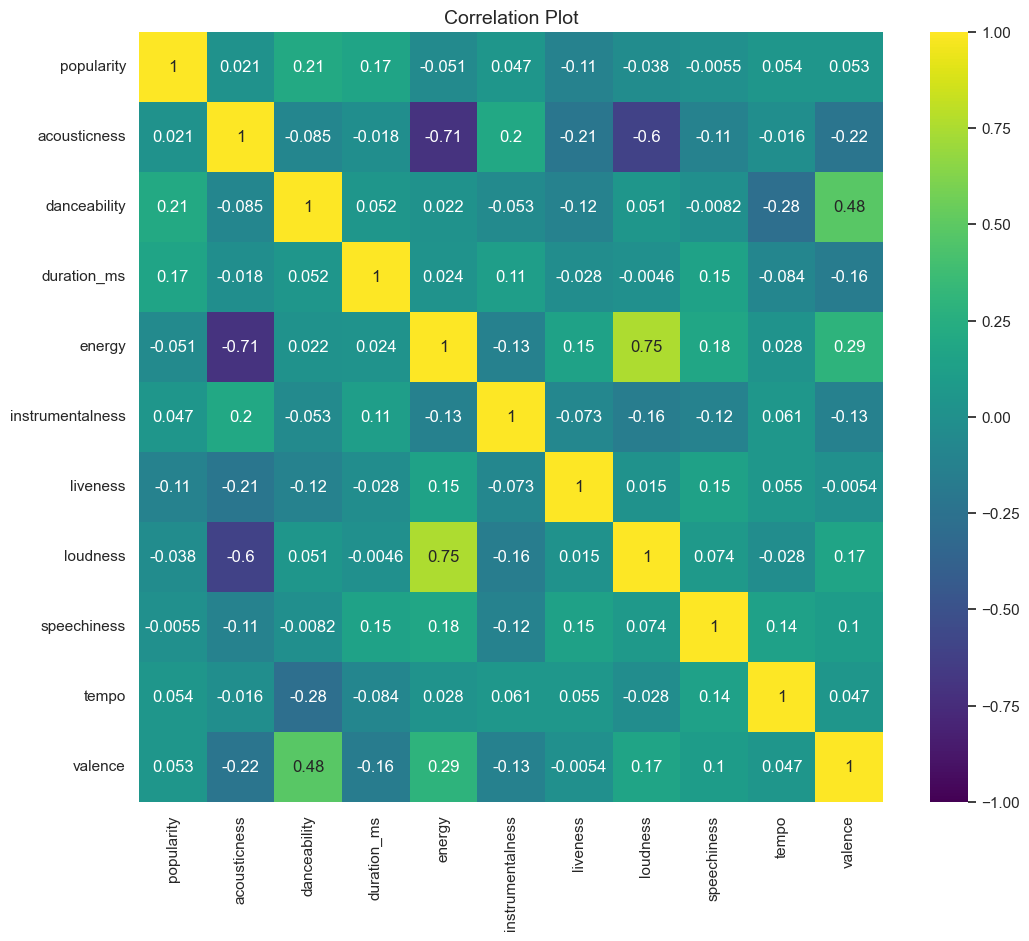

In [298]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='viridis', annot=True, vmin=-1, vmax=1)
plt.title("Correlation Plot", fontsize=14)
plt.show()

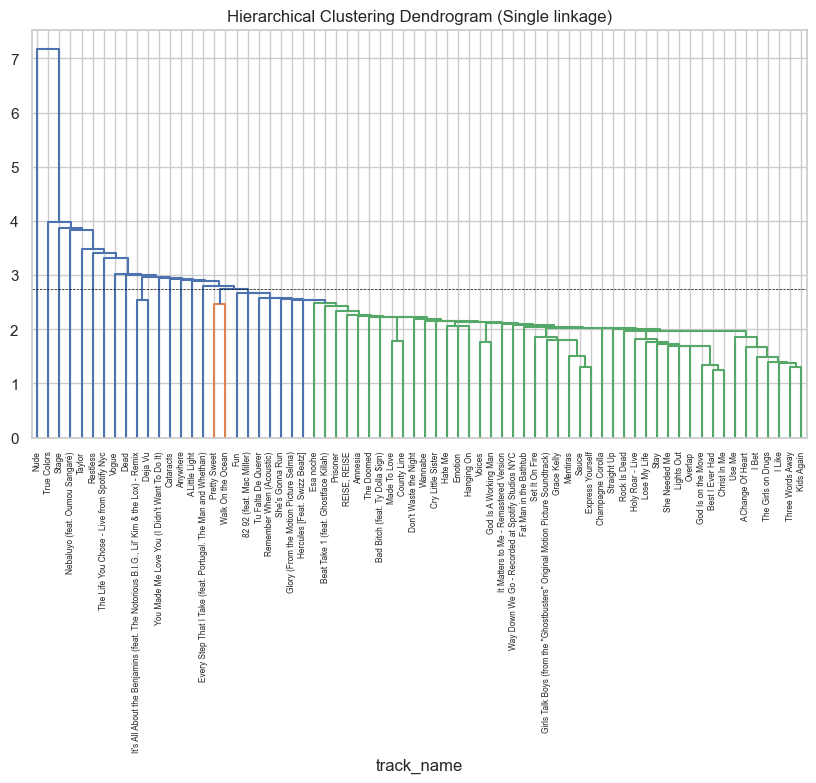

In [299]:
# Single Linkage Method
Z = linkage(songs_cluster_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('track_name')
# 'color_threshold = 2.5' represents the threthold of cluster development.
# It is a normalized dinstance between clusters (2.5), at which the agglomeration of records into clusters will stop.
# The higher this value, the less clusters will be created.
dendrogram(Z, labels=songs_cluster_norm.index, color_threshold=2.5)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

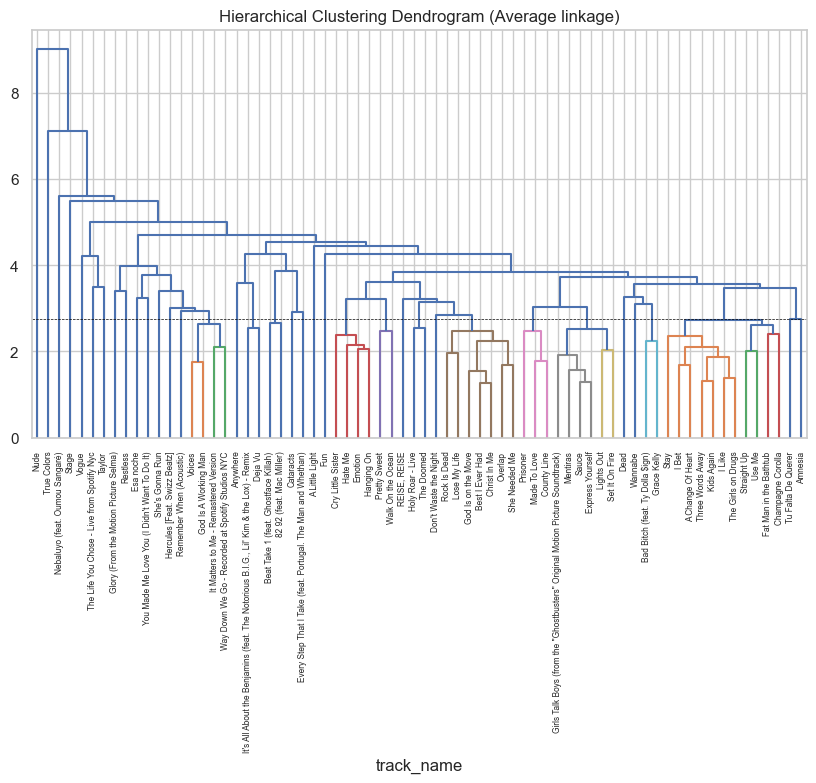

In [300]:
# average linkage method
Z_average = linkage(songs_cluster_norm, method='average')

# Plot the dendrogram using 'average' linkage method
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('track_name')

# 'color_threshold = 2.5' represents the threshold of cluster development.
dendrogram(Z_average, labels=songs_cluster_norm.index, color_threshold=2.5)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

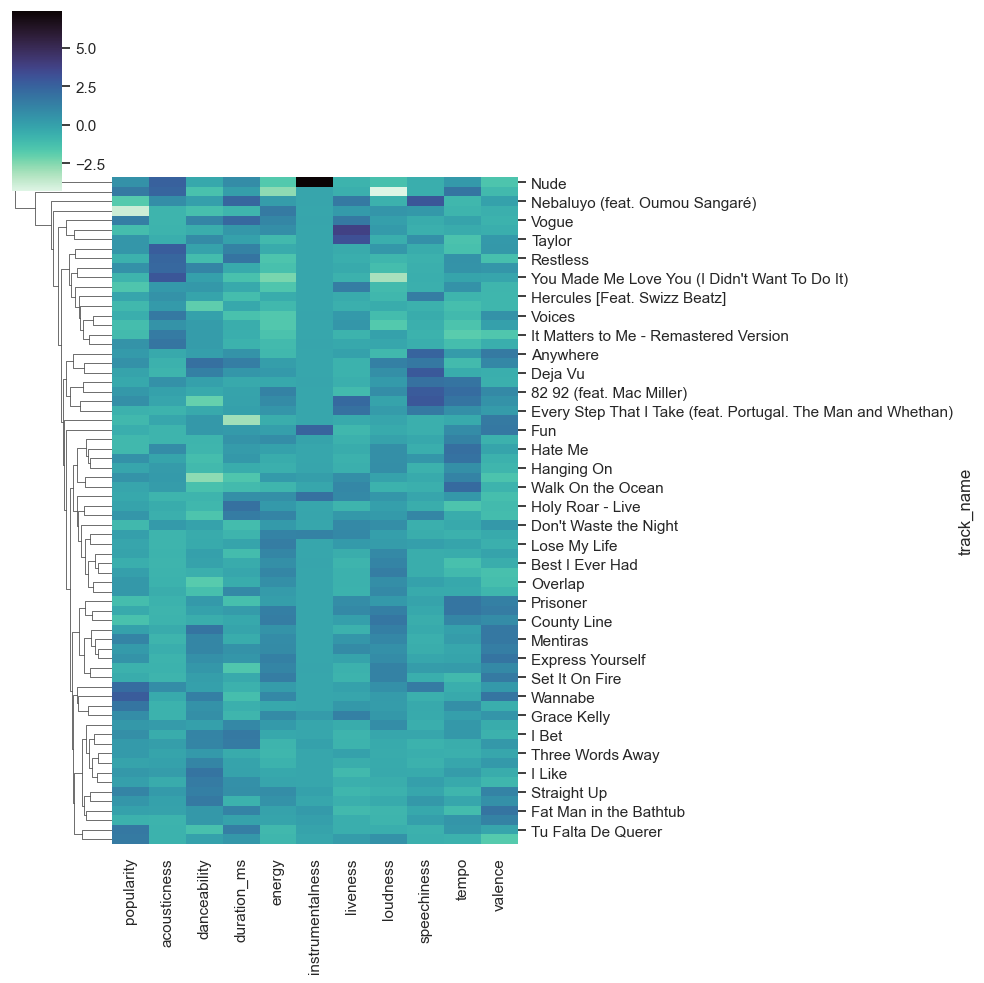

In [301]:
#Heat map
sns.clustermap(songs_cluster_norm, method='average', col_cluster=False,  cmap="mako_r") 
plt.show()

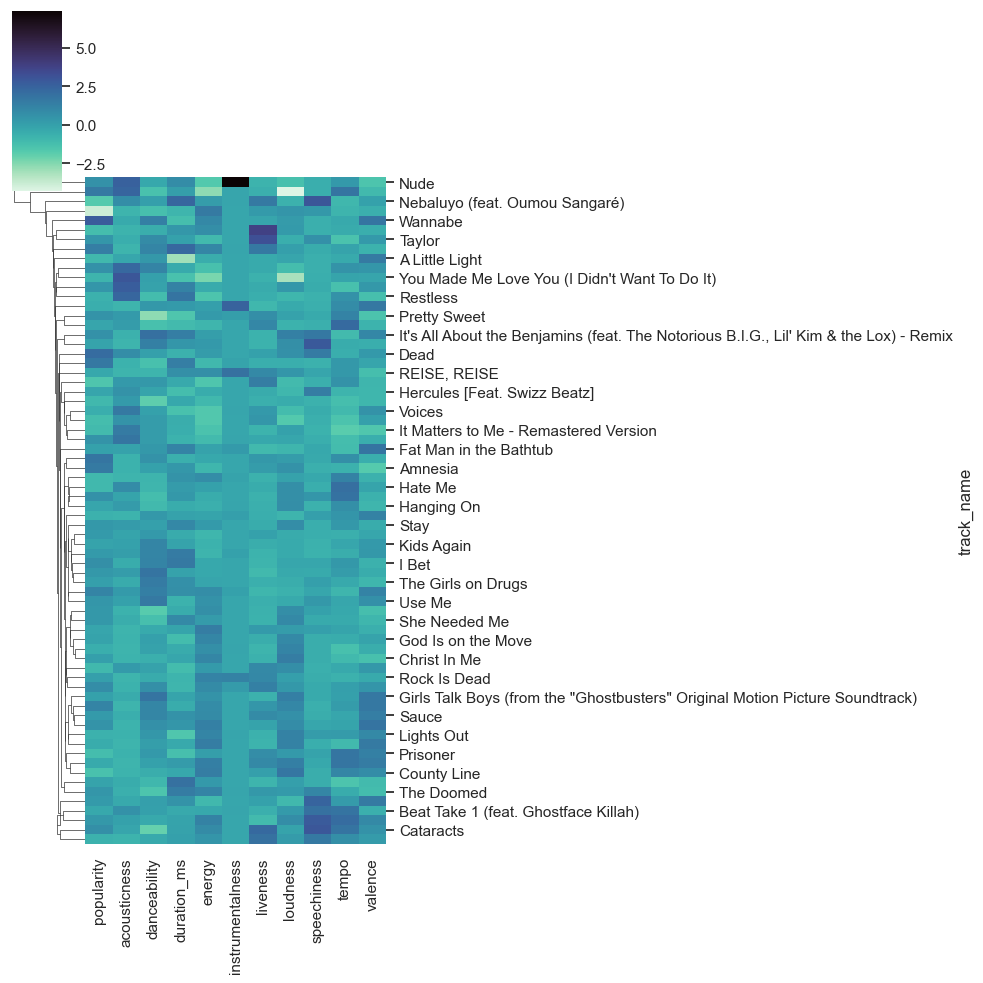

In [302]:
sns.clustermap(songs_cluster_norm, method='centroid', col_cluster=False,  cmap="mako_r") 
plt.show()

In [303]:
memb = fcluster(Z, 6, criterion='maxclust') 
memb = pd.Series(memb, index=songs_cluster_norm.index)

# Create data frame with means of each normalized input variable (measurement) for each cluster
cluster_mean = songs_cluster.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals.
cluster_mean['Cluster'] = ['Cluster {}'.format(i) for i in cluster_mean.index]
pd.set_option('display.precision', 3)

# Display the data frame with mean values and cluster titles.
print('Means of Input Variables for Clusters with Average Linkage Method')
songs_cluster

Means of Input Variables for Clusters with Average Linkage Method


popularity  acousticness  \
track_name                                                                     
Stay                                                        55     2.520e-01   
Sauce                                                       54     5.980e-02   
The Life You Chose - Live from Spotify Nyc                  39     1.160e-02   
Glory (From the Motion Picture Selma)                       56     8.670e-01   
Nebaluyo (feat. Oumou Sangaré)                              33     3.910e-01   
Fat Man in the Bathtub                                      51     1.800e-01   
Remember When (Acoustic)                                    41     2.640e-01   
Bad Bitch (feat. Ty Dolla $ign)                             70     2.830e-02   
Cataracts                                                   59     1.490e-01   
Hercules [Feat. Swizz Beatz]                                49     3.390e-01   
Pretty Sweet                                                57     2.580e-01   
Girls Talk Boys (from the "Ghostbusters" Origin...          51     9.010e-02   
Tu Falta De Querer                                          69     2.510e-02   
Restless                                                    44     7.740e-01   
Mentiras                                                    64     8.040e-03   
Walk On the Ocean                                           49     2.360e-01   
I Bet                                                       59     8.080e-02   
Amnesia                                                     68     2.830e-02   
Overlap                                                     55     2.730e-02   
Rock Is Dead                                                52     9.420e-06   
Straight Up                                                 64     2.670e-01   
Holy Roar - Live                                            50     8.430e-02   
I Like                                                      55     2.430e-01   
Stage                                                       10     1.610e-04   
Beat Take 1 (feat. Ghostface Killah)                        48     3.470e-01   
Voices                                                      45     6.020e-01   
Lose My Life                                                49     2.550e-03   
God Is on the Move                                          50     9.640e-03   
She's Gonna Run                                             35     2.730e-01   
Lights Out                                                  44     2.430e-02   
Best I Ever Had                                             45     7.640e-03   
Made To Love                                                47     7.100e-03   
Three Words Away                                            54     1.600e-01   
True Colors                                                 68     7.920e-01   
Champagne Corolla                                           44     9.930e-03   
Dead                                                        74     4.000e-01   
Hate Me                                                     41     4.080e-01   
Use Me                                                      56     1.930e-01   
82 92 (feat. Mac Miller)                                    55     1.940e-01   
Anywhere                                                    54     1.140e-01   
It's All About the Benjamins (feat. The Notorio...          58     4.050e-02   
The Doomed                                                  56     4.770e-02   
Express Yourself                                            57     1.080e-02   
It Matters to Me - Remastered Version                       40     5.710e-01   
Fun                                                         45     4.630e-03   
She Needed Me                                               55     7.610e-02   
A Change Of Heart                                           54     2.270e-01   
Set It On Fire                                              46     1.330e-03   
County Line                                         

In [304]:
cluster_mean

popularity  acousticness  danceability  duration_ms  energy  \
1      51.831     1.841e-01         0.581   220397.538   0.684   
2      56.000     6.130e-02         0.705   220680.000   0.474   
3      33.000     3.910e-01         0.585   317573.000   0.702   
4      10.000     1.610e-04         0.399   188120.000   0.981   
5      68.000     7.920e-01         0.386   226067.000   0.145   
6      58.000     8.330e-01         0.537   255387.000   0.342   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  \
1         1.048e-02     0.182    -6.366        0.080  120.429    0.501   
2         0.000e+00     0.641    -7.939        0.141   80.074    0.561   
3         1.330e-04     0.418    -8.220        0.338   92.959    0.483   
4         1.060e-04     0.224    -5.412        0.113   97.131    0.349   
5         1.960e-04     0.100   -16.940        0.036  171.630    0.262   
6         6.000e-01     0.086    -9.785        0.034  128.331    0.156   

     Cluster  
1  Cluster 1  
2  Cluster 2  
3  Cluster 3  
4  Cluster 4  
5  Cluster 5  
6  Cluster 6

   popularity  acousticness  danceability  duration_ms  energy  \
1       0.045        -0.067         0.030       -0.037   0.056   
2       0.434        -0.566         0.907       -0.030  -1.007   
3      -1.710         0.773         0.056        2.337   0.149   
4      -3.855        -0.814        -1.262       -0.825   1.562   
5       1.553         2.401        -1.355        0.102  -2.674   
6       0.621         2.568        -0.284        0.818  -1.675   

   instrumentalness  liveness  loudness  speechiness  tempo  valence  \
1            -0.099    -0.057     0.097       -0.044  0.016    0.044   
2            -0.232     3.219    -0.554        0.678 -1.397    0.308   
3            -0.231     1.629    -0.671        2.999 -0.946   -0.036   
4            -0.231     0.245     0.493        0.348 -0.800   -0.629   
5            -0.230    -0.639    -4.284       -0.557  1.808   -1.014   
6             7.375    -0.742    -1.319       -0.585  0.293   -1.482   

     Cluster  
1  Cluster 1  
2 

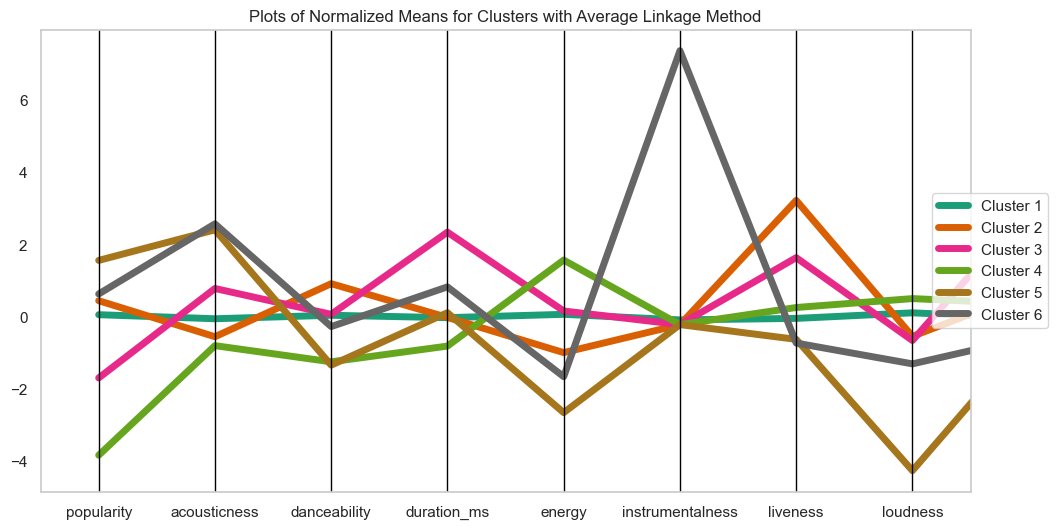

In [305]:
# Normalize the data columns
songs_cluster_norm = (songs_cluster- songs_cluster.mean()) / songs_cluster.std()
# Create data frame with means of each normalized input variable (measurement) for each cluster
cluster_mean_norm = songs_cluster_norm.groupby(memb).mean()
# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals.
cluster_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in cluster_mean_norm.index]
# Display the data frame with normalized mean values and cluster titles.
pd.set_option('display.precision', 3)
print(cluster_mean_norm)
# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(cluster_mean_norm, class_column='Cluster',
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5, 7.5)
plt.title('Plots of Normalized Means for Clusters with Average Linkage Method')
plt.show()

In [306]:
#Apply kMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(songs_cluster_norm)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=songs_cluster_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Fat Man in the Bathtub, Bad Bitch (feat. Ty Dolla $ign), Girls Talk Boys (from the "Ghostbusters" Original Motion Picture Soundtrack), I Bet, Straight Up, I Like, Three Words Away, Champagne Corolla, Use Me, It's All About the Benjamins (feat. The Notorious B.I.G., Lil' Kim & the Lox) - Remix, Fun, A Change Of Heart, The Girls on Drugs, Wannabe, Vogue, Kids Again
1 :  Nude
2 :  Glory (From the Motion Picture Selma), Restless, Voices, She's Gonna Run, True Colors, It Matters to Me - Remastered Version, Way Down We Go - Recorded at Spotify Studios NYC, Esa noche, God Is A Working Man, You Made Me Love You (I Didn't Want To Do It)
3 :  Sauce, The Life You Chose - Live from Spotify Nyc, Mentiras, Rock Is Dead, God Is on the Move, Lights Out, Made To Love, Express Yourself, Set It On Fire, County Line, Prisoner, A Little Light, Don't Waste the Night, Grace Kelly, Taylor
4 :  Nebaluyo (feat. Oumou Sangaré), Cataracts, Hercules [Feat. Swizz Beatz], Beat Take 1 (feat. Ghostface Killah), D

In [307]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=songs_cluster_norm.columns)
centroids

popularity  acousticness  danceability  duration_ms  energy  \
0       0.516        -0.328         1.113        0.390   0.025   
1       0.621         2.568        -0.284        0.818  -1.675   
2      -0.265         1.843        -0.056       -0.208  -1.553   
3      -0.268        -0.638         0.263       -0.617   0.745   
4       0.041         0.066        -0.146        0.112   0.158   
5      -0.135        -0.356        -1.031        0.172   0.222   

   instrumentalness  liveness  loudness  speechiness  tempo  valence  
0             0.016    -0.466    -0.154       -0.213 -0.189    0.504  
1             7.375    -0.742    -1.319       -0.585  0.293   -1.482  
2            -0.231    -0.165    -1.319       -0.588 -0.348   -0.405  
3            -0.104     0.729     0.661       -0.355 -0.009    0.831  
4            -0.232     0.325    -0.016        2.277  0.421    0.157  
5            -0.087    -0.212     0.380       -0.279  0.135   -0.863

In [308]:
# Create centroids DataFrame
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=songs_cluster_norm.columns)
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('display.precision', 3)
print(centroids)

   popularity  acousticness  danceability  duration_ms  energy  \
0       0.516        -0.328         1.113        0.390   0.025   
1       0.621         2.568        -0.284        0.818  -1.675   
2      -0.265         1.843        -0.056       -0.208  -1.553   
3      -0.268        -0.638         0.263       -0.617   0.745   
4       0.041         0.066        -0.146        0.112   0.158   
5      -0.135        -0.356        -1.031        0.172   0.222   

   instrumentalness  liveness  loudness  speechiness  tempo  valence  \
0             0.016    -0.466    -0.154       -0.213 -0.189    0.504   
1             7.375    -0.742    -1.319       -0.585  0.293   -1.482   
2            -0.231    -0.165    -1.319       -0.588 -0.348   -0.405   
3            -0.104     0.729     0.661       -0.355 -0.009    0.831   
4            -0.232     0.325    -0.016        2.277  0.421    0.157   
5            -0.087    -0.212     0.380       -0.279  0.135   -0.863   

     Cluster  
0  Cluster 0  
1 

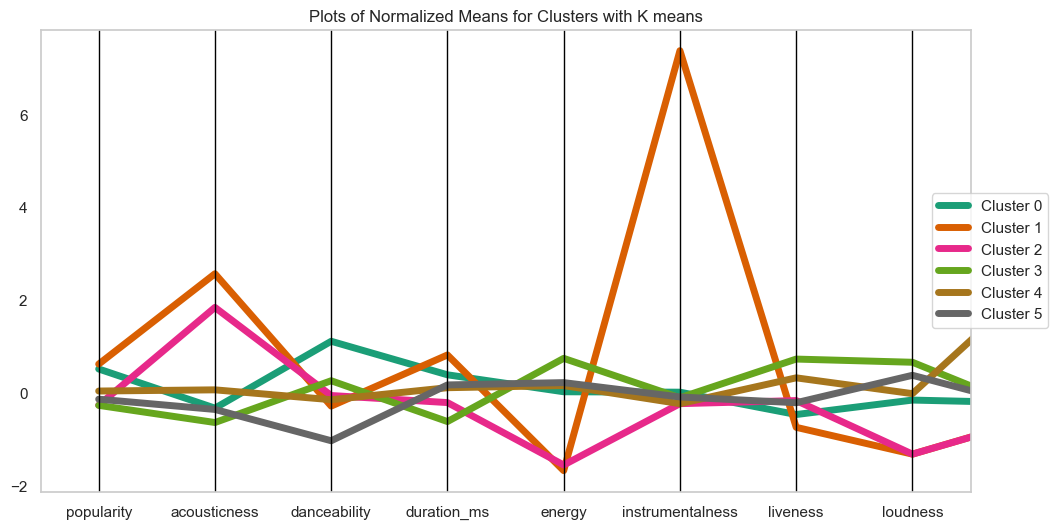

In [309]:
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='Cluster',
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5, 7.5)
plt.title('Plots of Normalized Means for Clusters with K means')
plt.show()

In [310]:
withinClusterSS = [0] * 6
clusterCount = [0] * 6
for cluster, distance in zip(kmeans.labels_, kmeans.transform(songs_cluster_norm)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, SS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster,
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (16 members): 83.68 within cluster
Cluster 1 (1 members):  0.00 within cluster
Cluster 2 (10 members): 73.39 within cluster
Cluster 3 (15 members): 87.55 within cluster
Cluster 4 (9 members): 66.57 within cluster
Cluster 5 (19 members): 112.88 within cluster


In [311]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

       0      1      2      3      4      5
0  0.000  8.564  3.470  2.288  3.075  2.729
1  8.564  0.000  7.886  9.317  9.059  8.547
2  3.470  7.886  0.000  4.259  4.165  3.542
3  2.288  9.317  4.259  0.000  3.137  2.555
4  3.075  9.059  4.165  3.137  0.000  3.019
5  2.729  8.547  3.542  2.555  3.019  0.000


In [312]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    20.125
1    43.373
2    23.322
3    21.555
4    22.455
5    20.392
dtype: float64

C:\Users\janar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


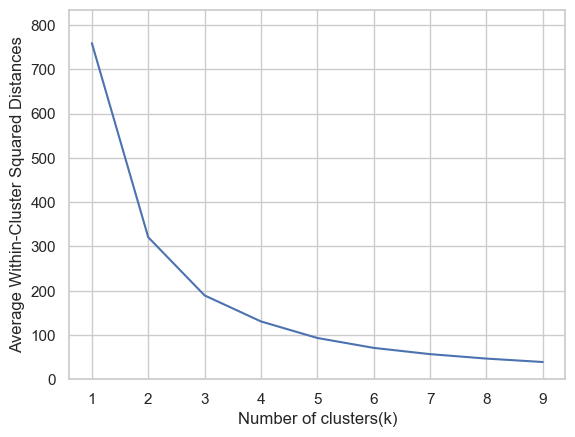

In [313]:
# Initialization
inertia = [] 
# Loop through different numbers of clusters:
for n_clusters in range(1, 10):
   # fit k-means model and calculate inertia:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(songs_cluster_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
# Create a DataFrame and plot the Elbow Curve:
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
# Plot Customization
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()